<a href="https://colab.research.google.com/github/hiddenSharp429/DNN-Python/blob/main/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第一步将数据集读入
原始的数据集data.txt部分截图：<br>
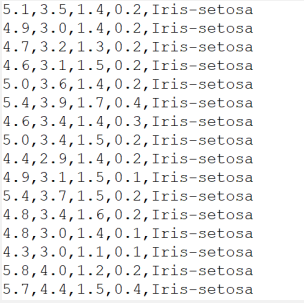<br>
稍微进行改动一下（添加了属性列并将格式转换为.csv）<br>
修改后的数据集data.csv部分截图：<br>
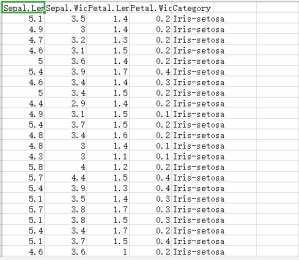
<br><br>
将data.csv读入并且将其存入标识符df中，定义数据集的筛选条件expr_1;expr_2;expr_3
- expr_1: 用于赛选Category属性列为iris-setosa的类sql语句
- expr_2: 用于赛选Category属性列为Iris-versicolor的类sql语句
- expr_3: 用于赛选Category属性列为Iris-virginica的类sql语句

用上面定义的筛选条件筛选出数据集中三个类别的数据，并分别存入对应的标识符中。

- Iris_setosa_dataframe： 所属类别为Iris-setosa的全部数据
- Iris_versicolor_dataframe： 所属类别为Iris-versicolor的全部数据
- Iris_virginica_dataframe： 所属类别为Iris-virginica的全部数据

In [1]:
import os
from google.colab import drive
from google.colab import files

# 如果尚未安装 Google 云端硬盘，请安装它
if not os.path.isdir("/content/drive/MyDrive"):
    drive.mount('/content/drive', force_remount=True)

#@markdown ### 选择上传的模式
upload_method = "Custom Path" #@param ["Upload", "Custom Path"]


if upload_method == "Upload":
    uploaded = files.upload()
    for filename in uploaded.keys():
        os.rename(filename, '/content/sample_data/input_vid.mp4')
    PATH_TO_YOUR_VIDEO = '/content/sample_data/input_vid.mp4'

elif upload_method == 'Custom Path':
    PATH_TO_YOUR_VIDEO = '/content/drive/MyDrive/data.csv' #@param {type:"string"}
    if not os.path.isfile(PATH_TO_YOUR_VIDEO):
        print("ERROR: File not found!")
        raise SystemExit(0)


In [2]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/data.csv") # 读取全部列表数据

expr_1 = "Category == 'Iris-setosa'" # 用于赛选Category属性列为iris-setosa的类sql语句
expr_2 = "Category == 'Iris-versicolor'" # 用于赛选Category属性列为Iris-versicolor的类sql语句
expr_3 = "Category == 'Iris-virginica'" # 用于赛选Category属性列为Iris-virginica的类sql语句

Iris_setosa_dataframe = df.query(expr_1)
Iris_versicolor_dataframe = df.query(expr_2)
Iris_virginica_dataframe = df.query(expr_3)

print("Iris_setosa_dataframe is:\n",Iris_setosa_dataframe)
print("Iris_versicolor_dataframe is\n",Iris_versicolor_dataframe)
print("Iris_virginica_dataframe is\n",Iris_virginica_dataframe)

Iris_setosa_dataframe is:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Category
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-

# 第二步将数据集按照测试集和训练集分类
人为规定训练集占比0.7，数据集为0.3<br>
下面将定义一个名为`get_train_and_test_dataframe`的函数，并返回训练集和测试集的DataFrame

In [3]:
total_record, attribute_rows = df.shape # 获取总记录条数和其属性列

train_data_rate = 0.7 # 训练集占数据集的比例，即70%
test_data_rate = 1 - train_data_rate # 测试集与训练集为互补集

def get_train_and_test_dataframe(df1, df2, df3, train_data_rate):
    train_df = pd.DataFrame() # 创建一个空的dataframe
    test_df = pd.DataFrame() # 创建一个空的dataframe
    df_array = [df1, df2, df3] # 将各个df子集存入一个列表用于变量

    for i in range(3):
        item_df_record_num, _ = df_array[i].shape # 获取每个df子集的记录总条数
        item_df_train_record_num = int(item_df_record_num* train_data_rate) # 计算每个df子集的训练数据总记录条数

        # 随机从df子集中抽取数量为 itemDf_trainRecordNum 的记录作为训练集
        train_records = df_array[i].sample(item_df_train_record_num)

        # 子集中除去被选出为测试集的其余记录作为测试集
        test_records = df_array[i][~df_array[i].index.isin(train_records.index)]

        # 将每个子集中的训练集添加到trainDf中
        train_df = pd.concat([train_df, train_records])

        # 将每个子集中的测试集添加到testDf中
        test_df = pd.concat([test_df, test_records])

    return train_df, test_df

train_data, test_data = get_train_and_test_dataframe(Iris_setosa_dataframe, Iris_versicolor_dataframe, Iris_virginica_dataframe, train_data_rate)

# 第三步定义深度神经网络
## 简介

## 作用


## 接口说明

# 返回参数说明


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义激活函数sigomid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 定义softmax函数
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# 初始化参数
def initialize_parameters(input_size, hidden_sizes, output_size):
    sizes = [input_size] + hidden_sizes + [output_size] # 使用列表拼接，将输入层的大小，隐藏层大小列表，输出层大小全部放入一个列表里
    parameters = {} # 定义一个空的参数字典

    for i in range(1, len(sizes)): # 从1循环到sizes的大小减一
        parameters['W' + str(i)] = np.random.randn(sizes[i-1], sizes[i]) * 0.01 # 随机生成每层的权重矩阵
        parameters['b' + str(i)] = np.zeros((1, sizes[i])) # 初始化每层的偏移矩阵

    return parameters

# 前向传播
def forward_propagation(X, parameters):
    cache = {'A0': X}
    # print("init cache:", cache)

    for i in range(1, len(parameters)//2):
        cache['Z' + str(i)] = np.dot(cache['A' + str(i-1)], parameters['W' + str(i)]) + parameters['b' + str(i)]
        cache['A' + str(i)] = sigmoid(cache['Z' + str(i)])

    # 输出层不使用sigmoid激活函数
    cache['A' + str(len(parameters)//2)] = np.dot(cache['A' + str(len(parameters)//2 - 1)], parameters['W' + str(len(parameters)//2)]) + parameters['b' + str(len(parameters)//2)]
    cache['O' + str(len(parameters)//2)] = softmax(cache['A' + str(len(parameters)//2)])

    # print('final cache:', cache)
    return cache

# 计算交叉熵损失
def compute_loss(Y, Y_hat):
    m = Y.shape[0] # 获取Y的样本数
    epsilon = 1e-8  # 微小常数，用于数值稳定性，防止出现0的情况
    loss = -1/m * np.sum(Y * np.log(Y_hat + epsilon)) # 将总损失除以样本数m，得到平均损失。负号表示最小化损失。
    return loss

# 反向传播
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[0]  # 获取样本数

    grads = {}  # 初始化梯度字典

    # 计算输出层的梯度
    dZ_last = cache['O' + str(len(parameters)//2)] - Y  # 计算输出层激活值的梯度
    grads['dW' + str(len(parameters)//2)] = 1/m * np.dot(cache['A' + str(len(parameters)//2 - 1)].T, dZ_last)  # 计算输出层权重的梯度
    grads['db' + str(len(parameters)//2)] = 1/m * np.sum(dZ_last, axis=0, keepdims=True)  # 计算输出层偏差的梯度

    dZ = dZ_last  # 初始化激活值梯度

    # 循环计算隐藏层的梯度
    for i in range(len(parameters)//2, 1, -1):
        dA = np.dot(dZ, parameters['W' + str(i)].T)  # 计算上一层激活值的梯度
        dZ = dA * cache['A' + str(i-1)] * (1 - cache['A' + str(i-1)])  # 计算当前层激活值的梯度
        grads['dW' + str(i-1)] = 1/m * np.dot(cache['A' + str(i-2)].T, dZ)  # 计算当前层权重的梯度
        grads['db' + str(i-1)] = 1/m * np.sum(dZ, axis=0, keepdims=True)  # 计算当前层偏差的梯度

    return grads  # 返回计算得到的梯度字典



# 更新参数
def update_parameters(parameters, grads, learning_rate):
    for i in range(1, len(parameters)//2 + 1):
        parameters['W' + str(i)] -= learning_rate * grads['dW' + str(i)]
        parameters['b' + str(i)] -= learning_rate * grads['db' + str(i)]

    return parameters

# 模型训练
def train_neural_network(X, Y, hidden_sizes, num_epochs, learning_rate=0.01):
    input_size = X.shape[1] # 训练集的特征数量（有多少个属性列）
    output_size = Y.shape[1] # 期望输出（预测）的所属类型的个数（有多少个类型）

    parameters = initialize_parameters(input_size, hidden_sizes, output_size) # 初始化权重w和偏移量b

    loss_history = [] # 定义空列表来记录损失函数的状态

    for epoch in range(num_epochs):
        # 前向传播
        cache = forward_propagation(X, parameters)
        Y_hat = cache['O' + str(len(parameters)//2)]

        # 计算损失
        loss = compute_loss(Y, Y_hat)
        loss_history.append(loss)

        # 反向传播
        grads = backward_propagation(X, Y, parameters, cache)

        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate)

        # 打印损失
        if epoch % 2000 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')


    return parameters, loss_history

# 第四步定义验证和打印函数
## 简介
`verify`函数是每次循环测试记录时需要调用的，可以用来打印结果和验证是否预测正确。
## 入口参数说明
- index：测试记录在数据集中的索引
- p_catagory：该测试记录经过贝叶斯分类后返回的结果（属于各类别的概率）
- real_category：该测试记录真实所属类别
- record_num：已经遍历测试记录的数量
- correct_num：已经遍历测试记录并且预测结果为正确的数量
- correct_rate：该模型的正确率

## 返回参数说明
- correct_num：同上
- correct_rate：同上

In [5]:
def verify(index, p_catagory, real_category, record_num, correct_num, correct_rate):

    print("测试结果已出，该测试记录所属类别的概率为\n",p_category) # 打印该记录所对应类别的概率
    max_probability = max(p_category.values())  # 获取最大的概率值

    for key, key_value in p_category.items(): # 寻找概率最大的类别
        if key_value == max_probability: ## 找到概率最大的类别
            print(f"第{index}记录的预测最可能的所属类别为:{key}")
            print(f"第{index}记录的真实属性为:{real_category}")
            if key == real_category: ## 查看预测的类别和真实的类别是否一样
                correct_num = correct_num + 1 # 若一样则correct_num++
            print("-------------------------")

    correct_rate = correct_num / record_num # 计算新的正确率
    return correct_num, correct_rate

# 第五步将训练集数据放入深度神经网络中训练

Epoch 0, Loss: 1.098653539371582
Epoch 2000, Loss: 1.0986122689353426
Epoch 4000, Loss: 1.0986121120972154
Epoch 6000, Loss: 1.0986117820046577
Epoch 8000, Loss: 1.0986107943481844
Epoch 10000, Loss: 1.098606195007866
Epoch 12000, Loss: 1.0985444397590844
Epoch 14000, Loss: 0.5483292369698377
Epoch 16000, Loss: 0.07814078794120709
Epoch 18000, Loss: 0.036424389012134475
Epoch 20000, Loss: 0.023985679426108585
Epoch 22000, Loss: 0.017907423458809368
Epoch 24000, Loss: 0.01423392852121378
Epoch 26000, Loss: 0.011717511661818501
Epoch 28000, Loss: 0.009861978839368448
Epoch 30000, Loss: 0.008432264185486033
Epoch 32000, Loss: 0.007299550706507141
Epoch 34000, Loss: 0.0063847482548591555
Epoch 36000, Loss: 0.0056351662792017915
Epoch 38000, Loss: 0.005013694734677501
Epoch 40000, Loss: 0.004493201595636312
Epoch 42000, Loss: 0.004053333903642746
Epoch 44000, Loss: 0.0036785389640715256
Epoch 46000, Loss: 0.003356762978269198
Epoch 48000, Loss: 0.0030785559996244012
Epoch 50000, Loss: 0.002

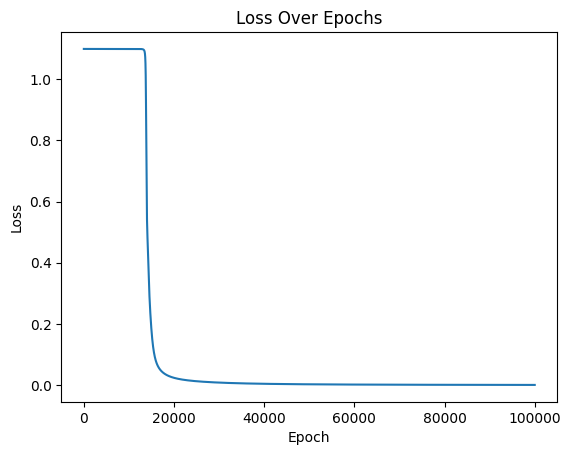

In [6]:
# 提取训练集特征和标签
X_train = train_data.iloc[:, :-1].values
Y_train = pd.get_dummies(train_data['Category']).values

# 训练神经网络
trained_parameters, loss_history = train_neural_network(X_train, Y_train, hidden_sizes=[5, 4], num_epochs=100000, learning_rate=0.09)

# 展示loss的折线图
plt.plot(loss_history)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 第六步将测试集数据放入神经网络中验证是否正确

In [8]:
# 提取测试集特征和标签
X_test = test_data.iloc[:, :-1].values
Y_test = pd.get_dummies(test_data['Category']).values

# 初始化参数
correct_rate = 0
correct_num = 0
record_num = 0
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for index, record in test_data.iterrows():
    record_num = record_num + 1 # 所遍历的测试记录条数+1

    Category = record['Category'] # 获取当前测试记录的真实所属类别
    print(f'记录:{index}, 所属类别:{Category}')

    record_x = [record['Sepal.Length'], record['Sepal.Width'], record['Petal.Length'], record['Petal.Width']] # 将当前测试记录的所有特征值合并成一个列表
    print(record_x)

    record_x_cache = forward_propagation(record_x, trained_parameters) # 调用深度神经网络进行测试，返回一个字典
    result_y = record_x_cache['O' + str(len(trained_parameters)//2)][0] # 用result_y来接收输出层的数据，具体形式是一个概率数组
    p_category = {label: value for label, value in zip(class_labels, result_y)} # 将概率数组拓广到字典，即原本的概率列表变成一个概率字典（键值对）
    print(p_category)

    correct_num, correct_rate = verify(index, p_category, Category, record_num, correct_num, correct_rate) # 更新正确条数和正确率

print(f'该模型的预测准确率为:{correct_rate}')



记录:0, 所属类别:Iris-setosa
[5.1, 3.5, 1.4, 0.2]
{'Iris-setosa': 0.9995876870960471, 'Iris-versicolor': 0.0004123128466841663, 'Iris-virginica': 5.726869885221553e-11}
测试结果已出，该测试记录所属类别的概率为
 {'Iris-setosa': 0.9995876870960471, 'Iris-versicolor': 0.0004123128466841663, 'Iris-virginica': 5.726869885221553e-11}
第0记录的预测最可能的所属类别为:Iris-setosa
第0记录的真实属性为:Iris-setosa
-------------------------
记录:5, 所属类别:Iris-setosa
[5.4, 3.9, 1.7, 0.4]
{'Iris-setosa': 0.9995805162674898, 'Iris-versicolor': 0.00041948367392952466, 'Iris-virginica': 5.858080373427034e-11}
测试结果已出，该测试记录所属类别的概率为
 {'Iris-setosa': 0.9995805162674898, 'Iris-versicolor': 0.00041948367392952466, 'Iris-virginica': 5.858080373427034e-11}
第5记录的预测最可能的所属类别为:Iris-setosa
第5记录的真实属性为:Iris-setosa
-------------------------
记录:6, 所属类别:Iris-setosa
[4.6, 3.4, 1.4, 0.3]
{'Iris-setosa': 0.999569362803667, 'Iris-versicolor': 0.000430637135698144, 'Iris-virginica': 6.063485486590333e-11}
测试结果已出，该测试记录所属类别的概率为
 {'Iris-setosa': 0.999569362803667, 'Iris-versicolor